##1. Mounting Drive with Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import scipy.stats as st
import plotly.graph_objects as go
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

##3. Loading the dataset

In [3]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Unemployment.csv")
data.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region_dir', 'longitude', 'latitude']
df = pd.DataFrame(data)

##4. Exploratory Data Analysis

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_dir,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_dir,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [ ]:
df.shape

(267, 9)

In [ ]:
df.size

2403

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region_dir                               267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.describe(include="all")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_dir,longitude,latitude
count,267,267,267,267.000000,2.670000e+02,267.000000,267,267.000000,267.000000
unique,27,10,1,NaN,NaN,NaN,5,NaN,NaN
top,Andhra Pradesh,31-03-2020,M,NaN,NaN,NaN,North,NaN,NaN
freq,10,27,267,NaN,NaN,NaN,79,NaN,NaN
mean,NaN,NaN,NaN,12.236929,1.396211e+07,41.681573,NaN,22.826048,80.532425
std,NaN,NaN,NaN,10.803283,1.336632e+07,7.845419,NaN,6.270731,5.831738
min,NaN,NaN,NaN,0.500000,1.175420e+05,16.770000,NaN,10.850500,71.192400
25%,NaN,NaN,NaN,4.845000,2.838930e+06,37.265000,NaN,18.112400,76.085600
50%,NaN,NaN,NaN,9.650000,9.732417e+06,40.390000,NaN,23.610200,79.019300
75%,NaN,NaN,NaN,16.755000,2.187869e+07,44.055000,NaN,27.278400,85.279900


In [ ]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region_dir                                 0
longitude                                  0
latitude                                   0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region_dir', 'longitude', 'latitude'],
      dtype='object')

##5. Data Visualisation

<Axes: title={'center': 'Log Normal'}, xlabel='Estimated Unemployment Rate (%)'>

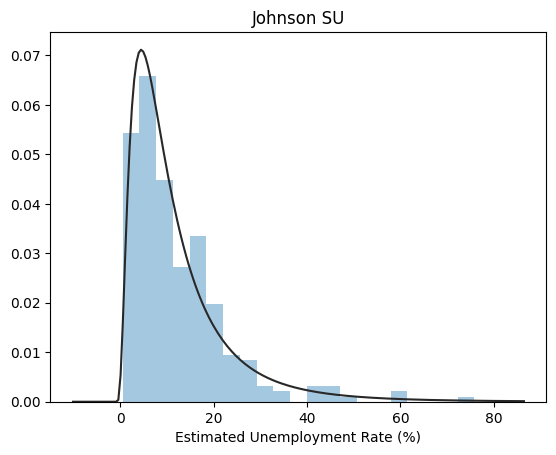

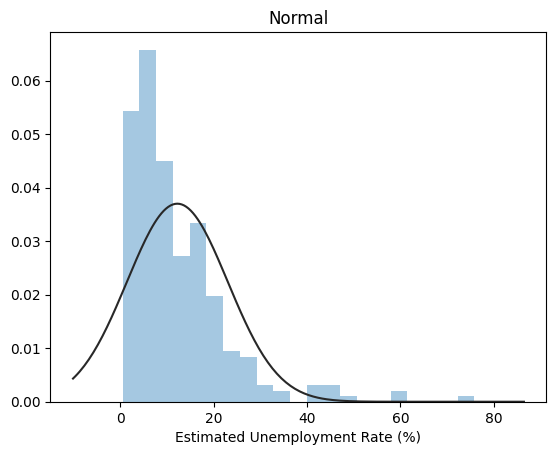

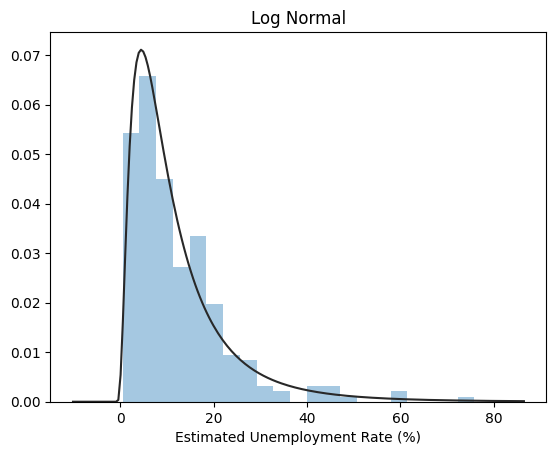

In [ ]:
y = data['Estimated Unemployment Rate (%)']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

<Axes: xlabel='Kurtosis(red) & skewness(blue)', ylabel='Density'>

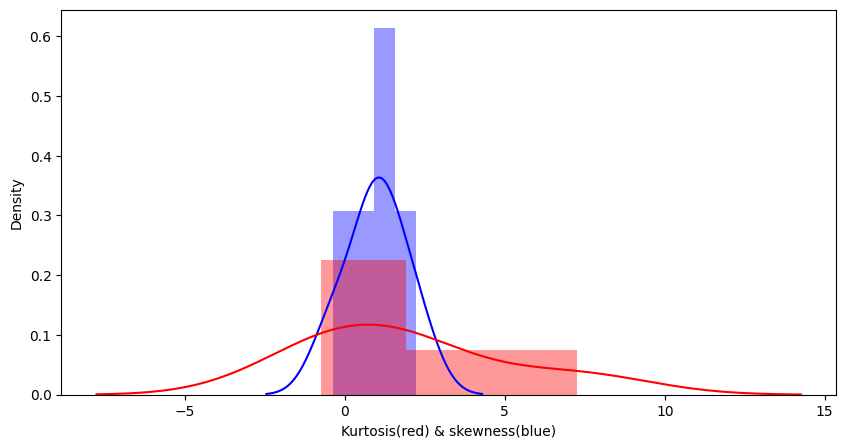

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(data.skew(),color='blue',axlabel ='Skewness')
sns.distplot(data.kurt(),color='r',axlabel ='Kurtosis(red) & skewness(blue)',norm_hist= False, kde = True,rug = False)

the data is normally distributed. i.e., skewness is 0

<Axes: xlabel='Estimated Labour Participation Rate (%)', ylabel='Estimated Unemployment Rate (%)'>

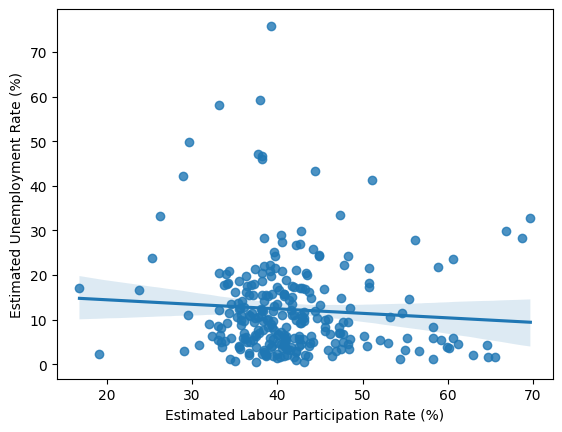

In [ ]:
OverallQual_scatter_plot = pd.concat([data['Estimated Unemployment Rate (%)'],data['Estimated Labour Participation Rate (%)']],axis = 1)
sns.regplot(x='Estimated Labour Participation Rate (%)',y = 'Estimated Unemployment Rate (%)',data = OverallQual_scatter_plot,scatter= True, fit_reg=True)

In [11]:
fig = px.scatter(data, x='Region', y='Estimated Labour Participation Rate (%)', animation_frame='Date',height=600, width=800,template="plotly_dark",
                 color = 'Region_dir',title='Estimated Labour Participation Rate (%) Region Wise')

fig.update_layout(transition = {'duration': 2000},
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust the margin values as per your requirements
    xaxis=dict(title='Region', tickangle=35,tickfont=dict(size=10)),
    yaxis=dict(title='Estimated Labour Participation Rate (%)')
)
fig.show()

In [15]:

fig = px.bar_polar(data, r='Estimated Unemployment Rate (%)', theta='Region', color='Region_dir',
                   color_discrete_sequence= px.colors.sequential.Plasma_r,template="plotly",
                   title="Estimated Unemployment Rate by Region"
                  )
fig.show()

In [ ]:
# for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
fig = px.scatter(data,
                     x='Estimated Unemployment Rate (%)', y='Region_dir', size='Estimated Labour Participation Rate (%)', color='Region',
                     log_x=True, size_max=60, height=730,
                     template="plotly_dark", title="The Labour Force Participation Gap" )
fig.show()

In [ ]:
import plotly.graph_objects as go
dataf = {"line_x": [], "line_y": [], "31-01-2020": [], "31-10-2020": []}
countries = ['Andhra Pradesh','Assam','Bihar','Chhattisgarh','Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu & Kashmir','Jharkhand',
             'Karnataka','Kerala','Madhya Pradesh','Maharashtra','Meghalaya','Odisha','Puducherry','Punjab',
             'Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand','West Bengal']
region = ['Andhra Pradesh','Assam','Bihar','Chhattisgarh','Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu & Kashmir','Jharkhand',
             'Karnataka','Kerala','Madhya Pradesh','Maharashtra','Meghalaya','Odisha','Puducherry','Punjab',
             'Rajasthan','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand','West Bengal']

for country in countries:
  if country != "Sikkim":
        temp1 = data.loc[(data['Date']==' 31-01-2020')  & (data.Region == countries[i])]
        d1 = temp1['Estimated Unemployment Rate (%)'].values[0]
        dataf['31-01-2020'].append(d1)
  temp2 = data.loc[(data['Date']==' 31-10-2020')  & (data.Region == country)]
  d2 = temp2['Estimated Unemployment Rate (%)'].values[0]
  dataf["31-10-2020"].append(d2)

  dataf["line_x"].append(d1)
  dataf["line_x"].append(d2)
  dataf["line_x"].append(None)
  dataf["line_y"].append(country)
  dataf["line_y"].append(country)
  dataf["line_y"].append(None)


fig = go.Figure(
    data=[
        go.Scatter(
            x=dataf["line_x"],
            y=dataf["line_y"],
            mode="markers+lines",
            showlegend=False,
            marker=dict(
                symbol="arrow",
                color="black",
                size=16,
                angleref="previous",
                standoff=8
            )
        ),
        go.Scatter(
            x=dataf["31-01-2020"],
            y=region,
            name="31-01-2020",
            mode="markers",
            marker=dict(
                color="silver",
                size=16,
            )
        ),
        go.Scatter(
            x=dataf["31-10-2020"],
            y=countries,
            name="31-10-2020",
            mode="markers",
            marker=dict(
                color="lightskyblue",
                size=16,
            ),
        ),

        ]
)

fig.update_layout(
    title="Estimated Unemployment Rate (%): 31-01-2020 and 31-10-2020",
    height=1000,
    legend_itemclick=False
)


fig.show()